# Classification of the anemia by conjunctiva

# Data loading

In [ ]:
import pickle

dataset = pickle.load(open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/x_final_conjunctiva.pkl', 'rb'))
labels = pickle.load(open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/y_final_conjunctiva.pkl', 'rb'))

In [ ]:
print(dataset.shape)
print(len(labels))

(4272, 64, 64, 3)
4272


# Data Split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset,  labels, test_size=0.30, random_state=42)

# x_train=x_train/255
# x_test=x_test/255


# Model Network

# AlexNet Model


In [ ]:

from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import EarlyStopping

my_callbacks = [EarlyStopping(monitor='loss', patience=2)]

Alexnet=Sequential()
Alexnet.add(Conv2D(filters=128, kernel_size=(1,12), strides=(1,6), activation='relu', input_shape=(1,37158,3)))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(1,2)))
Alexnet.add(Conv2D(filters=256, kernel_size=(1,6), strides=(1,2), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(1,2)))
Alexnet.add(Conv2D(filters=256, kernel_size=(1,3), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(1,2)))
Alexnet.add(Flatten())
Alexnet.add(Dense(1024,activation='relu'))
Alexnet.add(Dropout(0.5))
Alexnet.add(Dense(1024,activation='relu'))
Alexnet.add(Dropout(0.5))
Alexnet.add(Dense(2,activation='softmax'))
Alexnet.summary()

Alexnet.load_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_model.h5', skip_mismatch=False, by_name=False, options=None)

optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07)

# Compile the model
Alexnet.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model training
history=Alexnet.fit(x=x_train,y=y_train, batch_size=32, epochs=50000, verbose="auto", callbacks=my_callbacks)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 1, 6192, 128)      4736      
                                                                 
 batch_normalization_5 (Batc  (None, 1, 6192, 128)     512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 3096, 128)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1548, 256)      196864    
                                                                 
 batch_normalization_6 (Batc  (None, 1, 1548, 256)     1024      
 hNormalization)                                                 
                                                      

In [ ]:
Alexnet.save_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_model.h5', overwrite=True, save_format='h5', options=None)

In [ ]:
pickle.dump(history, open('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_history.pkl', 'wb'))

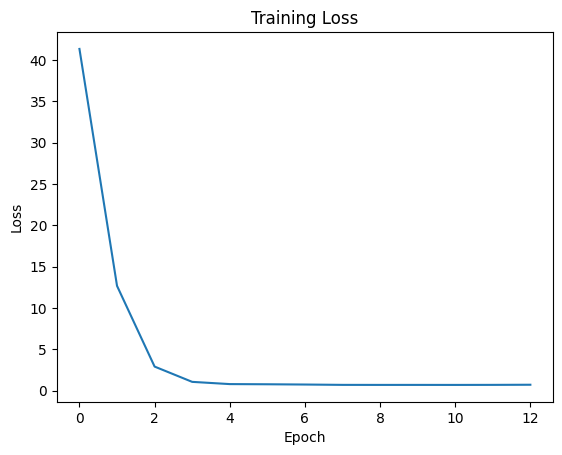

In [ ]:
import matplotlib.pyplot as plt
history = pickle.load(open('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_history.pkl', 'rb'))

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_Loss_curve.png")
plt.show()

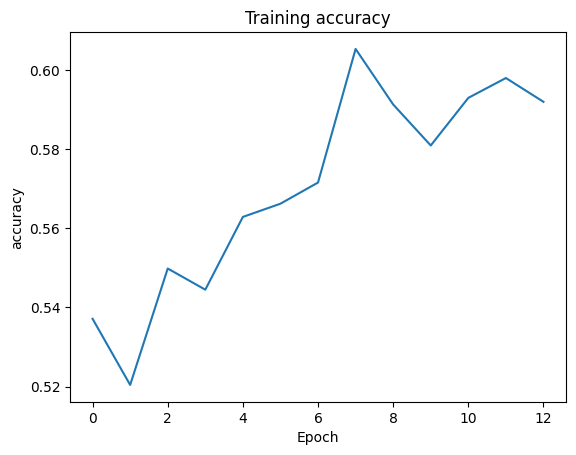

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_accuracy_curve.png")
plt.show()


In [ ]:
Alexnet.load_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_model.h5', skip_mismatch=False, by_name=False, options=None)

## Prediction

In [ ]:
results = Alexnet.evaluate(x_test, y_test)
print("test loss, test acc:", results)

41/41 [==============================] - 61s 1s/step - loss: 0.6688 - accuracy: 0.5913
test loss, test acc: [0.6687870025634766, 0.5912636518478394]


In [ ]:
prediction = Alexnet.predict(x_test)

41/41 [==============================] - 47s 1s/step


## Confusion matrix

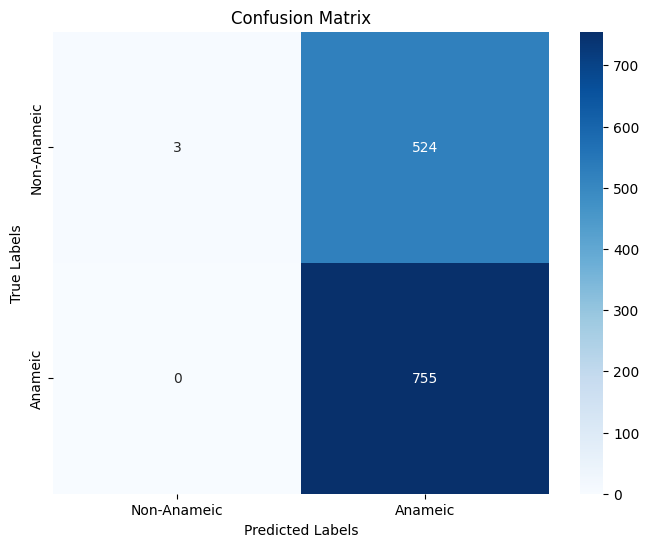

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predicted_classes = np.argmax(prediction, axis=1)

confusion_mat = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Anameic", "Anameic"], yticklabels=["Non-Anameic", "Anameic"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_confusion_matrix.png") #save as png
plt.show()

# AlexNet Model_2


In [ ]:

from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import EarlyStopping

my_callbacks = [EarlyStopping(monitor='loss', patience=5)]

Alexnet=Sequential()
Alexnet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(2,2)))
Alexnet.add(Conv2D(filters=128 , kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(2,2)))
Alexnet.add(Conv2D(filters=128 , kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(Conv2D(filters=128 , kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(Conv2D(filters=128 , kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
Alexnet.add(BatchNormalization())
Alexnet.add(MaxPooling2D(pool_size=(2,2)))
Alexnet.add(Flatten())
Alexnet.add(Dense(1024,activation='relu'))
Alexnet.add(Dropout(0.4))
Alexnet.add(Dense(1024,activation='relu'))
Alexnet.add(Dropout(0.4))
Alexnet.add(Dense(2,activation='softmax'))
Alexnet.summary()

#Alexnet.load_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet_model.h5', skip_mismatch=False, by_name=False, options=None)

optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07)

# Compile the model
Alexnet.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model training
history=Alexnet.fit(x=x_train,y=y_train, batch_size=32, epochs=50000, verbose="auto", callbacks=my_callbacks)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         307328    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                        

In [ ]:
Alexnet.save_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_model.h5', overwrite=True, save_format='h5', options=None)

In [ ]:
pickle.dump(history, open('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_history.pkl', 'wb'))

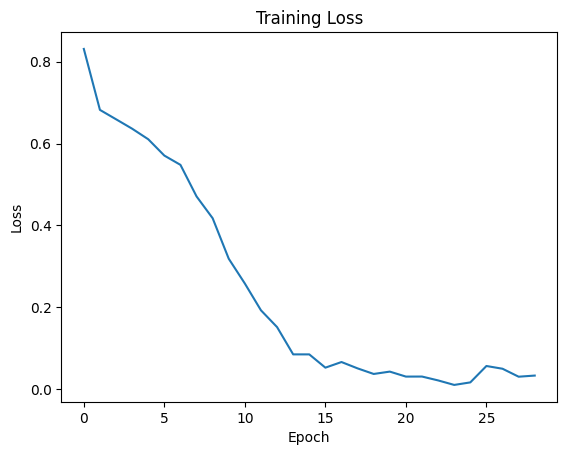

In [ ]:
import matplotlib.pyplot as plt
#history = pickle.load(open('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_history.pkl', 'rb'))

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_Loss_curve.png")
plt.show()

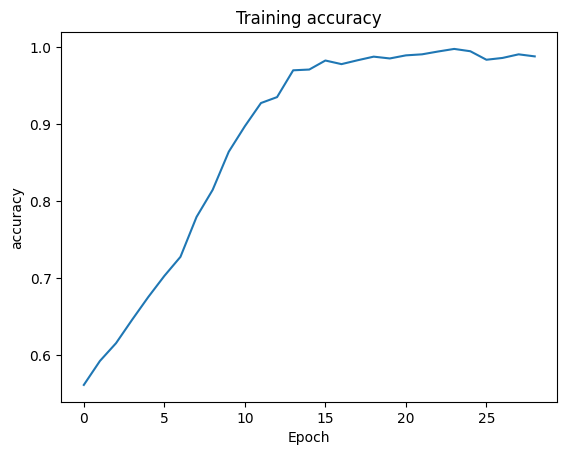

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_accuracy_curve.png")
plt.show()


In [ ]:
Alexnet.load_weights('/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_model.h5', skip_mismatch=False, by_name=False, options=None)

## Prediction

In [ ]:
results = Alexnet.evaluate(x_test, y_test)
print("test loss, test acc:", results)

41/41 [==============================] - 3s 59ms/step - loss: 0.8421 - accuracy: 0.8814
test loss, test acc: [0.8421383500099182, 0.8814352750778198]


In [ ]:
prediction = Alexnet.predict(x_test)

41/41 [==============================] - 3s 54ms/step


## Confusion matrix

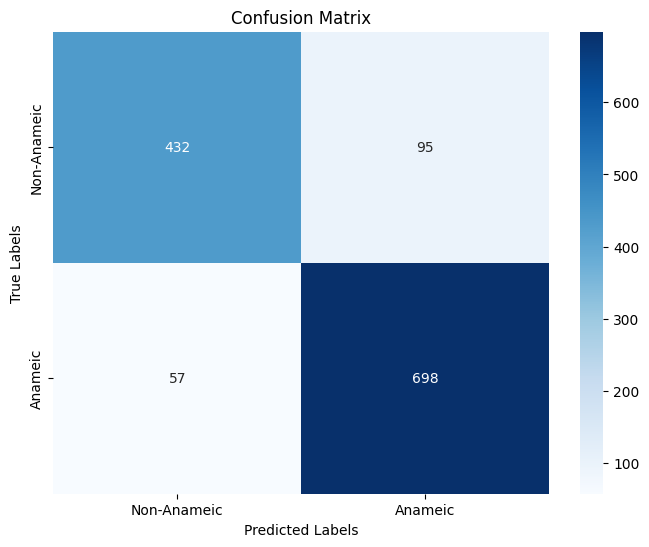

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predicted_classes = np.argmax(prediction, axis=1)

confusion_mat = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Anameic", "Anameic"], yticklabels=["Non-Anameic", "Anameic"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva/Alexnet3_confusion_matrix.png") #save as png
plt.show()